# 1. Cropper를 활용한 이미지 전처리
### Cropper의 필수 패키지 호출

In [2]:
import os
import random
import dlib
import matplotlib.pyplot as plt
from PIL import Image 
import glob 
from autocrop import Cropper 

plt.rc('font', family='NanumGothic') # Korean Font

### 대회의 데이터를 형식에 맞게 추출
#### 약 64만개의 real data를 glob을 사용하여 호출 

In [12]:
real_paths=glob.glob('D:/dacon/deepfake_1st/real/*/*/*/*/*.jpg')

#### Cropper의 경우 사진에서 얼굴을 인식하지 못하면 NoneType을 배출하기 때문에 이를 방지하기 위하여
#### 사전에 None을 배출하는 사진을 지정해준다.

In [13]:
cropper = Cropper()
cropped_array = cropper.crop(real_paths[0])
print(type(cropped_array))

<class 'NoneType'>


### 모든 파일을 순서대로 Cropper하여 이미지로 저장

In [14]:
b=type(cropped_array)
for z in range(len(real_paths)):
    cropper = Cropper()
    cropped_array = cropper.crop(real_paths[z])
    if type(cropped_array)!=b:
        cropped_image = Image.fromarray(cropped_array)
        cropped_array = cropped_image.resize((300, 300))
        k= str(z)+'.jpg'
        cropped_array.save(k)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


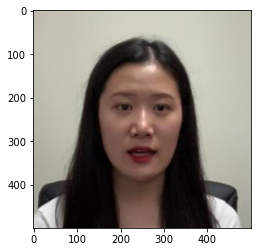

In [17]:
plt.imshow(cropped_image)

### Fake 데이터 처리
#### 위와 마찬가지로 fake 데이터를 호출하고 cropper를 사용하여 저장

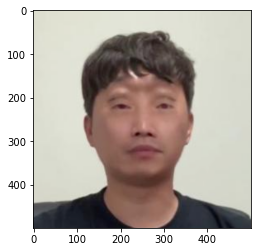

In [21]:
fake_paths=glob.glob('D:/dacon/deepfake_1st/fake/*/*/*/*/*.jpg')
cropper = Cropper()
cropped_array = cropper.crop(fake_paths[0])
b=type(cropped_array)
for z in range(len(fake_paths)):
    cropper = Cropper()
    cropped_array = cropper.crop(fake_paths[z])
    if type(cropped_array)!=b:
        cropped_image = Image.fromarray(cropped_array)
        cropped_array = cropped_image.resize((300, 300))
        k= str(z)+'.jpg'
        cropped_array.save(k)
plt.imshow(cropped_image)

# 2. MTCNN을 활용한 이미지 전처리
### MTCNN의 필수 패키지 호출

In [ ]:
import os
import random
import dlib
import matplotlib.pyplot as plt
from PIL import Image 
import glob 

plt.rc('font', family='NanumGothic') # Korean Font